In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_mat = pd.read_pickle('df_mat-modelling-range_G3_5-repaired_G3_0_values.pkl')

df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,1,2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,1,0,1,0,1,1,1,0,4,3,2,2,3,3,1,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,0,1,1,0,1,1,0,0,4,3,2,1,2,5,2,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [3]:
df_mat.shape

(395, 43)

In [4]:
X = np.array(df_mat.drop('G3',axis = 1))
y = np.array(df_mat['G3'])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Linear Regression

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = model.predict(X_test)

In [8]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,2.161377,3
1,2.301758,3
2,2.677490,2
3,3.323486,3
4,3.199463,3


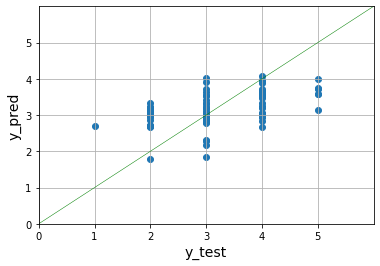

In [9]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [10]:
mean_absolute_error(y_pred,y_test)

0.7080170836629747

In [11]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [12]:
rmse(y_pred,y_test)

0.8379970713777992

## Decision Tree Regression

In [13]:
rmse_scorer = make_scorer(rmse,greater_is_better = False)

In [14]:
param_grid = {'min_samples_leaf':[1,5,10,20,50,100],'max_depth':[1,2,5,10,20,30,50]}

grid_search_cv = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = param_grid,cv=5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             pre_di

In [15]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
y_pred = grid_search_cv.predict(X_test)

In [17]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,2.99537,3
1,2.99537,3
2,2.99537,2
3,2.99537,3
4,2.99537,3


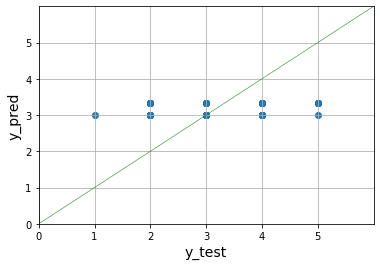

In [18]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [19]:
mean_absolute_error(y_pred,y_test)

0.7178809188935771

In [20]:
rmse(y_pred,y_test)

0.907117498202486

## Random Forest Regression

In [21]:
param_grid = {'min_samples_leaf':[1,10,50],'max_depth':[1,5,30],'n_estimators':[10,50,100]}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(),param_grid = param_grid,cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [22]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
y_pred = grid_search_cv.predict(X_test)

In [24]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,2.82,3
1,2.76,3
2,3.20,2
3,3.20,3
4,2.98,3


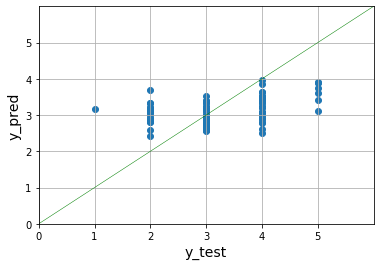

In [25]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [26]:
mean_absolute_error(y_pred,y_test)

0.7235443037974684

In [27]:
rmse(y_pred,y_test)

0.8692321651676411

## XGBoost 

In [28]:
parameters = {'max_depth':[1,5,30],'learning_rate':[0.01,0.1,0.3],'n_estimators':[10,50,100],'objective':'reg:squarederror'}

grid_search_cv = GridSearchCV(estimator = xgboost.XGBRegressor(silent = True),param_grid = param_grid,
                              cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 30],
                         'min_samples_leaf': [1, 10, 50],
                        

In [29]:
grid_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, min_samples_leaf=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1)

In [30]:
y_pred = grid_search_cv.predict(X_test)

In [31]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,2.290454,3
1,2.601753,3
2,2.943503,2
3,3.010184,3
4,2.923776,3


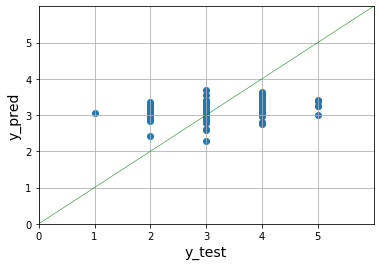

In [32]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [33]:
mean_absolute_error(y_pred,y_test)

0.738971770564212

In [34]:
rmse(y_pred,y_test)

0.8886224094927997

## Neural Network 

In [35]:
sc = MinMaxScaler()

In [36]:
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
X_train.shape

(316, 42)

In [38]:
model = Sequential()

In [39]:
model.add(Dense(42,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(42,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(42,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(42,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [40]:
model.fit(X_train,y_train,validation_data = (X_test,y_test.values),batch_size = 128,epochs = 30)

Train on 316 samples, validate on 79 samples
Epoch 1/30
316/316 [==============================] - 1s 3ms/sample - loss: 11.5799 - val_loss: 10.7113
Epoch 2/30
316/316 [==============================] - 0s 103us/sample - loss: 9.7413 - val_loss: 9.1540
Epoch 3/30
316/316 [==============================] - 0s 66us/sample - loss: 8.2279 - val_loss: 7.6760
Epoch 4/30
316/316 [==============================] - 0s 76us/sample - loss: 7.0170 - val_loss: 6.1933
Epoch 5/30
316/316 [==============================] - 0s 63us/sample - loss: 5.4234 - val_loss: 4.6619
Epoch 6/30
316/316 [==============================] - 0s 70us/sample - loss: 4.0226 - val_loss: 3.1241
Epoch 7/30
316/316 [==============================] - 0s 66us/sample - loss: 2.7909 - val_loss: 1.7792
Epoch 8/30
316/316 [==============================] - 0s 63us/sample - loss: 2.0744 - val_loss: 0.9896
Epoch 9/30
316/316 [==============================] - 0s 70us/sample - loss: 2.2842 - val_loss: 0.8646
Epoch 10/30
316/316 [=====

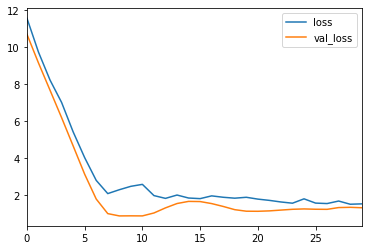

In [41]:
losses = pd.DataFrame(model.history.history)

losses.plot();

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,2.080830,3
1,2.057954,3
2,2.208059,2
3,2.094511,3
4,2.719220,3


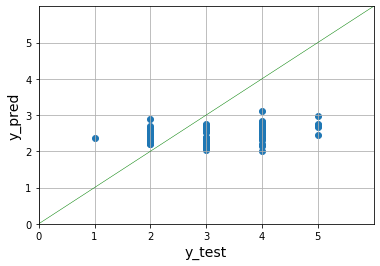

In [44]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [45]:
mean_absolute_error(y_pred,y_test)

0.9724014680596846

In [46]:
rmse(y_pred,y_test)

1.1434857895312234

## Stacking 

In [47]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,random_state = 42)

### Base Models 

In [48]:
model = DecisionTreeRegressor(min_samples_leaf = 100,max_depth = 1)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [49]:
model = RandomForestRegressor(min_samples_leaf = 10,max_depth = 30,n_estimators = 10)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [50]:
model = xgboost.XGBRegressor(silent = True,max_depth = 1,learning_rate = 0.1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [51]:
model = Sequential()

model.add(Dense(42,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(42,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(42,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(42,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

model.fit(X_train,y_train,validation_data = (X_base,y_base),batch_size = 128,epochs = 30)

Train on 316 samples, validate on 158 samples
Epoch 1/30
316/316 [==============================] - 1s 2ms/sample - loss: 10.5188 - val_loss: 9.8650
Epoch 2/30
316/316 [==============================] - 0s 79us/sample - loss: 8.9880 - val_loss: 8.6708
Epoch 3/30
316/316 [==============================] - 0s 73us/sample - loss: 7.6529 - val_loss: 7.4160
Epoch 4/30
316/316 [==============================] - 0s 76us/sample - loss: 6.4650 - val_loss: 6.0535
Epoch 5/30
316/316 [==============================] - 0s 73us/sample - loss: 4.9338 - val_loss: 4.5939
Epoch 6/30
316/316 [==============================] - 0s 66us/sample - loss: 3.3789 - val_loss: 3.1449
Epoch 7/30
316/316 [==============================] - 0s 76us/sample - loss: 2.6753 - val_loss: 1.9069
Epoch 8/30
316/316 [==============================] - 0s 70us/sample - loss: 2.2638 - val_loss: 1.1797
Epoch 9/30
316/316 [==============================] - 0s 66us/sample - loss: 2.2937 - val_loss: 0.9830
Epoch 10/30
316/316 [======

In [52]:
y_pred_nn_meta = model.predict(X_meta)
y_pred_nn_test = model.predict(X_test)

In [53]:
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)
y_pred_nn_meta = pd.DataFrame(y_pred_nn_meta)

df_X_meta = pd.concat([y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta],axis = 1)
df_X_meta.columns = ['y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta','y_pred_nn_meta']

df_X_meta.head()

,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta
0,3.202532,3.155835,3.257294,2.545119
1,3.202532,3.145091,3.624766,2.365221
2,3.202532,3.398213,3.480914,2.303948
3,3.202532,3.159831,3.037688,2.367657
4,3.202532,3.022305,2.995509,2.481462


In [54]:
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)
y_pred_nn_test = pd.DataFrame(y_pred_nn_test)

df_X_test = pd.concat([y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test],axis = 1)
df_X_test.columns = ['y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test','y_pred_nn_test']

df_X_test.head()

,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test
0,3.202532,2.986497,2.224617,1.869749
1,3.202532,3.086630,2.624168,1.718355
2,3.202532,3.040807,3.178879,2.031226
3,3.202532,2.843489,3.014936,2.608134
4,3.202532,3.136420,3.543945,2.279858


### Meta Model 

In [55]:
model = LinearRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [56]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,2.584729,3
1,2.512742,3
2,2.653570,2
3,2.941816,3
4,2.885165,3


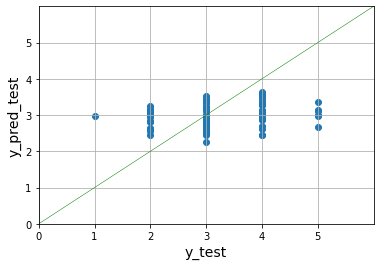

In [57]:
plt.scatter(df_temp['y_test'],df_temp['y_pred_test'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [58]:
mean_absolute_error(y_pred_test,y_test)

0.7928127807156338

In [59]:
rmse(y_pred_test,y_test)

0.9510319855177835